## **1. Búsqueda y Scrapping de tweets**

------------------

Utilizamos ```Selenium``` con un navegador Chrome configurado para automatizar la búsqueda de tweets en Twitter (X) relacionados con una lista de palabras clave específicas sobre el trap argentino. El script navega a la página de búsqueda de Twitter para cada palabra clave, realiza desplazamientos para cargar más tweets y extrae información relevante de cada tweet, como el usuario, contenido, fecha, enlaces, menciones, retweets y likes. Luego, los datos recolectados se almacenan en un DataFrame de pandas y se guardan en un archivo CSV para su análisis posterior. 

---------------

In [ ]:
import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys  # Importar Keys
import undetected_chromedriver as uc
import re

# Configuración de opciones para Chrome
options = uc.ChromeOptions()
options.add_argument(r"--user-data-dir=C:\Users\adria\AppData\Local\Google\Chrome\User Data")  # Ruta al perfil de usuario de Chrome
options.add_argument(r"--profile-directory=Default")  # Selección del perfil de Chrome

# Iniciar navegador sin headless para ver si todo funciona bien
driver = uc.Chrome(options=options, version_main=135)  # Inicia un navegador Chrome con las opciones configuradas

# Lista de palabras clave relacionadas con estafas
keywords_list = [
    # Palabras clave relacionadas con el trap argentino, artistas y eventos
    "trap argentino",
    "música urbana argentina",
    "freestyle argentino",
    "escena trap argentina",
    "cultura trap argentina",
    'Omar Varela polémica',
    "Duki",
    "Bizarrap",
    "Trueno",
    "KHEA",
    "YSY A",
    "Cazzu",
    "Nicki Nicole",
    "Lit Killah",
    "Tiago PZK",
    "Neo Pistea",
    "Ecko",
    "L-Gante",
    "Bhavi",
    "CRO",
    'Ramma', 'Sixto Yegros', 'ACRU', 'Lucho SSJ',
    "Quinto Escalón",
    "BZRP Music Sessions",
    "Modo Diablo",
    "FMS Argentina",
    'Barderos',
    'Homer el Mero Mero Ysy A',
    "Cosquín Rock",
    "Movistar Arena",
    "La Renga y el trap",
    'polémica trap argentino',
    "Duki nuevo tema",
    "Bizarrap session",
    "YSY A videoclip",
    "freestyle Quinto Escalón",
    "Bizarrap ft",
    "escena trap Argentina"
]

# Lista para almacenar los tweets
tweets_data = []

# Número de desplazamientos para cargar más tweets
scrolls = 5  # Número de veces que se hará scroll hacia abajo en la página

# Bucle para hacer una búsqueda para cada palabra clave
for keyword in keywords_list:
    # URL de búsqueda en Twitter (X)
    driver.get(f"https://twitter.com/search?q={keyword}&src=typed_query&f=live")  # Abre la página de búsqueda en Twitter
    time.sleep(5)  # Espera a que cargue la página

    for _ in range(scrolls):
        # Extraer tweets
        tweet_elements = driver.find_elements(By.XPATH, '//article[@data-testid="tweet"]')  # Encuentra los tweets en la página

        for tweet in tweet_elements:
            try:
                # Usuario
                user = tweet.find_element(By.XPATH, './/span[contains(text(), "@")]').text  # Extrae el nombre de usuario
                # Contenido del tweet
                content = tweet.find_element(By.XPATH, './/div[@lang]').text  # Extrae el contenido del tweet
                # Fecha y hora
                date_time = tweet.find_element(By.XPATH, './/time').get_attribute('datetime')  # Extrae la fecha y hora del tweet
                # Enlaces en el tweet
                links = [link.get_attribute('href') for link in tweet.find_elements(By.XPATH, './/a')]  # Extrae los enlaces del tweet
                # Respuestas y menciones
                mentions = re.findall(r'@\w+', content)  # Busca menciones en el contenido del tweet
                # Retweets y likes (visibles en la parte inferior del tweet)
                retweets = tweet.find_element(By.XPATH, './/div[@data-testid="retweet"]').text if tweet.find_elements(By.XPATH, './/div[@data-testid="retweet"]') else '0'  # Extrae el número de retweets
                likes = tweet.find_element(By.XPATH, './/div[@data-testid="like"]').text if tweet.find_elements(By.XPATH, './/div[@data-testid="like"]') else '0'  # Extrae el número de likes
                
                # Guardar los datos extraídos
                tweets_data.append({
                    "Palabra Clave": keyword,  # Añadimos la palabra clave
                    "Usuario": user,
                    "Contenido": content,
                    "Fecha y Hora": date_time,
                    "Enlaces": links,
                    "Respuestas/Menciones": mentions,
                    "Retweets": retweets,
                    "Likes": likes
                })
            except Exception as e:
                print(f"Error al procesar un tweet: {e}")  # Manejo de errores en caso de que falle la extracción
                continue

        # Hacer scroll
        driver.find_element(By.TAG_NAME, "body").send_keys(Keys.END)  # Simula la tecla END para hacer scroll hacia abajo
        time.sleep(5)  # Espera para cargar más tweets

# Guardar los datos en un DataFrame
df = pd.DataFrame(tweets_data)  # Convierte los datos recolectados en un DataFrame de pandas

# Guardar en CSV para análisis posterior
df.to_csv("tweets_trap_argentino.csv", index=False)  # Guarda los datos en un archivo CSV

# Imprimir el número de tweets recolectados
print(f"Se han recolectado {len(df)} tweets.")  # Muestra cuántos tweets se recolectaron

# Cerrar el navegador
driver.quit()  # Cierra el navegador


Error al procesar un tweet: Message: no such element: Unable to locate element: {"method":"xpath","selector":".//div[@lang]"}
  (Session info: chrome=135.0.7049.96); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x003F8073+60707]
	GetHandleVerifier [0x003F80B4+60772]
	(No symbol) [0x00220683]
	(No symbol) [0x00268660]
	(No symbol) [0x002689FB]
	(No symbol) [0x0025DD81]
	(No symbol) [0x0028D094]
	(No symbol) [0x0025DCA4]
	(No symbol) [0x0028D2C4]
	(No symbol) [0x002AE824]
	(No symbol) [0x0028CE46]
	(No symbol) [0x0025C5D3]
	(No symbol) [0x0025D424]
	GetHandleVerifier [0x0063BB53+2435075]
	GetHandleVerifier [0x006370F3+2416035]
	GetHandleVerifier [0x0065349C+2531660]
	GetHandleVerifier [0x0040F145+155125]
	GetHandleVerifier [0x00415AED+182173]
	GetHandleVerifier [0x003FF948+91640]
	GetHandleVerifier [0x003FFAF0+92064]
	GetHandleVerifier [0x003EA5B0+4704]
	Bas

--------------

De nuevo, utilizamos Selenium para automatizar la búsqueda de tweets en Twitter (X) relacionados con una lista de hashtags específicos sobre el trap argentino. El script configura un navegador Chrome mediante `undetected_chromedriver` para evitar restricciones, accede a la página de búsqueda de Twitter para cada hashtag, realiza desplazamientos hacia abajo para cargar más tweets y extrae información relevante de cada tweet, como el usuario, contenido, idioma, fecha, enlaces, menciones, retweets y likes. Solo se conservan los tweets en español o inglés. Finalmente, los datos recolectados se almacenan en un DataFrame de pandas y se guardan en un archivo CSV para su análisis posterior.

-----------------

In [ ]:
import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import undetected_chromedriver as uc
import re
from urllib.parse import quote

# Configuración de opciones para Chrome
options = uc.ChromeOptions()
options.add_argument(r"--user-data-dir=C:\Users\adria\AppData\Local\Google\Chrome\User Data")
options.add_argument(r"--profile-directory=Default")

# Iniciar navegador
driver = uc.Chrome(options=options, version_main=135)

keywords_list = ["#TrapArgentino",
    "#BZRP",
    "#Bizarrap",
    "#Duki",
    "#YSYSMODOTRAP",
    "#ModoDiablo",
    "#FreestyleArgentino",
    "#NickiNicole",
    "#Trueno",
    "#TrapArgentino concierto",
     ' #BésameRemix']




tweets_data = []
scrolls = 10

for keyword in keywords_list:
    print(f"🔍 Buscando tweets para: {keyword}")
    search_url = f"https://twitter.com/search?q={quote(keyword)}&src=typed_query&f=live"
    driver.get(search_url)
    time.sleep(10)

    for _ in range(scrolls):
        tweet_elements = driver.find_elements(By.XPATH, '//article[@data-testid="tweet"]')

        for tweet in tweet_elements:
            try:
                # Extraer contenido del tweet con idioma
                content_div = tweet.find_element(By.XPATH, './/div[@lang]')
                lang = content_div.get_attribute('lang')
                
                # Solo conservar tweets en español o inglés
                if lang not in ['es', 'en']:
                    continue

                user = tweet.find_element(By.XPATH, './/span[contains(text(), "@")]').text
                content = content_div.text
                date_time = tweet.find_element(By.XPATH, './/time').get_attribute('datetime')
                links = [link.get_attribute('href') for link in tweet.find_elements(By.XPATH, './/a')]
                mentions = re.findall(r'@\w+', content)
                retweets = tweet.find_element(By.XPATH, './/div[@data-testid="retweet"]').text if tweet.find_elements(By.XPATH, './/div[@data-testid="retweet"]') else '0'
                likes = tweet.find_element(By.XPATH, './/div[@data-testid="like"]').text if tweet.find_elements(By.XPATH, './/div[@data-testid="like"]') else '0'

                if keyword.lower() in content.lower():
                    tweets_data.append({
                        "Palabra Clave": keyword,
                        "Usuario": user,
                        "Contenido": content,
                        "Idioma": lang,
                        "Fecha y Hora": date_time,
                        "Enlaces": links,
                        "Respuestas/Menciones": mentions,
                        "Retweets": retweets,
                        "Likes": likes
                    })

            except Exception as e:
                print(f"⚠️ Error al procesar un tweet: {e}")
                continue

        driver.find_element(By.TAG_NAME, "body").send_keys(Keys.END)
        time.sleep(5)

# Guardar los datos en un DataFrame
df = pd.DataFrame(tweets_data)
df.to_csv("tweets_hashtags_trap_argentino.csv", index=False)

print(f"\n✅ Se han recolectado {len(df)} tweets en español o inglés.")
driver.quit()

🔍 Buscando tweets para: #TrapArgentino
🔍 Buscando tweets para: #BZRP
🔍 Buscando tweets para: #Bizarrap
🔍 Buscando tweets para: #Duki
🔍 Buscando tweets para: #YSYSMODOTRAP
🔍 Buscando tweets para: #ModoDiablo
🔍 Buscando tweets para: #FreestyleArgentino
🔍 Buscando tweets para: #NickiNicole
🔍 Buscando tweets para: #Trueno
🔍 Buscando tweets para: #TrapArgentino concierto
🔍 Buscando tweets para:  #BésameRemix

✅ Se han recolectado 240 tweets en español o inglés.


---------------------

A continuación, combinamos los datos de dos archivos CSV, `tweets_trap_argentino.csv` y `tweets_hashtags_trap_argentino.csv`, que contienen información recopilada de tweets relacionados con el trap argentino. Primero, se cargan ambos archivos en dataframes de pandas (`aa` y `bb`). Luego, se concatenan estos dataframes en uno solo, ignorando los índices originales, y se guarda el resultado en un nuevo archivo llamado `tweets_argentinos_combis.csv`.


----------------------

In [ ]:
aa = pd.read_csv('tweets_trap_argentino.csv')
bb = pd.read_csv('tweets_hashtags_trap_argentino.csv')

pd.concat([aa,bb], ignore_index=True).to_csv('tweets_argentinos_combis.csv')

df = pd.read_csv('tweets_argentinos_combis.csv')

In [11]:
df

,Unnamed: 0,Palabra Clave,Usuario,Contenido,Fecha y Hora,Enlaces,Respuestas/Menciones,Retweets,Likes,Idioma
0,0,trap argentino,@FanFutMexa,"se nota que escuchas Trap argentino, que mamas",2025-04-22T06:30:33.000Z,"['https://x.com/FanFutMexa', 'https://x.com/Fa...",[],0,0,NaN
1,1,trap argentino,@Orsosang,"el argentino es lo mas latino que hay, le enca...",2025-04-22T05:00:00.000Z,"['https://x.com/Orsosang', 'https://x.com/Orso...",[],0,0,NaN
2,2,trap argentino,@paprika_trap,"Libertario promedio: ""ño bizito adgentina"" \nE...",2025-04-22T03:43:39.000Z,"['https://x.com/paprika_trap', 'https://x.com/...",[],0,0,NaN
3,3,trap argentino,@ppartedemi_,trap argentino?,2025-04-21T23:28:17.000Z,"['https://x.com/ppartedemi_', 'https://x.com/p...",[],0,0,NaN
4,4,trap argentino,@medici_tiagop,el futuro del trap argentino es ramma ni cabid...,2025-04-21T23:23:50.000Z,"['https://x.com/medici_tiagop', 'https://x.com...",[],0,0,NaN
...,...,...,...,...,...,...,...,...,...,...
1099,1099,#NickiNicole,@rollingstoneEE,"#Miranda con #NickiNicole, #Béele con #MarcAnt...",2025-04-21T23:01:33.000Z,"['https://x.com/rollingstoneEE', 'https://x.co...",[],0,0,es
1100,1100,#NickiNicole,@isabelracal,#HaceRato #Miranda! ft. #NickiNicole https://y...,2025-04-22T03:53:37.000Z,"['https://x.com/isabelracal', 'https://x.com/i...",['@YouTube'],0,0,es
1101,1101,#NickiNicole,@dante_moliterni,"Haciendo estilo realista por primera vez, dibu...",2025-04-22T01:34:53.000Z,"['https://x.com/dante_moliterni', 'https://x.c...",['@Nicki_Nicole19'],0,0,es
1102,1102,#NickiNicole,@rollingstoneEE,"#Miranda con #NickiNicole, #Béele con #MarcAnt...",2025-04-22T01:31:14.000Z,"['https://x.com/rollingstoneEE', 'https://x.co...",[],0,0,es


--------------------

Lo mismo que los anteriores solo que basadas en una lista de palabras clave relacionadas con el trap argentino y sus polémicas.

----------------

In [ ]:
import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys  # Importar Keys para simular teclas como END
import undetected_chromedriver as uc  # Usar undetected_chromedriver para evitar bloqueos de detección
import re

# Configuración de opciones para el navegador Chrome
options = uc.ChromeOptions()
options.add_argument(r"--user-data-dir=C:\Users\adria\AppData\Local\Google\Chrome\User Data")  # Ruta al perfil de usuario de Chrome
options.add_argument(r"--profile-directory=Default")  # Directorio del perfil predeterminado

# Iniciar el navegador con las opciones configuradas
driver = uc.Chrome(options=options, version_main=135)

# Lista de palabras clave para buscar en Twitter (X)
keywords_list = [
    "Paulo Londra Big Ligas",
    "Paulo Londra demanda",
    "Paulo Londra Warner",
    "Paulo Londra regreso",
    "Paulo Londra juicio",
    "Paulo Londra polémica",
    "Paulo Londra trap",

    "YSYSMO",
    "YSYSMO es un movimiento",
    "YSYSMO no es moda",
    "YSYSMO vs Modo Diablo",
    
    "Modo Diablo separación",
    "Homer El Mero Mero YSY A pelea",
    "Ysy A CRO bardo",
    "Bizarrap y Duki distancia",
    
    "Cazzu Nicki Nicole comparación",
    "Nicki Nicole peso",
    "Nicki Nicole",
    "Nicki Nicole infiel",
    
    "bardo trap argentino",
    "fandoms enfrentados trap argentino",
    "trap argentino toxicidad",
    "hate a artistas trap argetino",
    "twitter trap argentino bardos",
    "trap argentino beef",
    "beef Duki",
    "beef Paulo Londra",
    "beef Bizarrap",
    
    "cancelado trap argentino",
    "cancelación en el trap argentino",
    "cancelar artistas argentinos",
    "trap argentino polémicas 2024",
    
    "tiradera trap argentino",
    "tiradera freestyle argentino",
]

# Lista para almacenar los datos de los tweets recolectados
tweets_data = []

# Número de desplazamientos hacia abajo para cargar más tweets
scrolls = 15

# Bucle para realizar una búsqueda en Twitter para cada palabra clave
for keyword in keywords_list:
    # Construir la URL de búsqueda en Twitter con la palabra clave
    driver.get(f"https://twitter.com/search?q={keyword}&src=typed_query&f=live")
    time.sleep(5)  # Esperar a que la página cargue completamente

    for _ in range(scrolls):
        # Extraer los elementos de los tweets en la página
        tweet_elements = driver.find_elements(By.XPATH, '//article[@data-testid="tweet"]')

        for tweet in tweet_elements:
            try:
                # Extraer el nombre de usuario del tweet
                user = tweet.find_element(By.XPATH, './/span[contains(text(), "@")]').text
                # Extraer el contenido del tweet
                content = tweet.find_element(By.XPATH, './/div[@lang]').text
                # Extraer la fecha y hora del tweet
                date_time = tweet.find_element(By.XPATH, './/time').get_attribute('datetime')
                # Extraer los enlaces presentes en el tweet
                links = [link.get_attribute('href') for link in tweet.find_elements(By.XPATH, './/a')]
                # Extraer las menciones o respuestas en el contenido del tweet
                mentions = re.findall(r'@\w+', content)
                # Extraer el número de retweets (si está disponible)
                retweets = tweet.find_element(By.XPATH, './/div[@data-testid="retweet"]').text if tweet.find_elements(By.XPATH, './/div[@data-testid="retweet"]') else '0'
                # Extraer el número de likes (si está disponible)
                likes = tweet.find_element(By.XPATH, './/div[@data-testid="like"]').text if tweet.find_elements(By.XPATH, './/div[@data-testid="like"]') else '0'
                
                # Guardar los datos extraídos en la lista
                tweets_data.append({
                    "Palabra Clave": keyword,  # Añadir la palabra clave asociada al tweet
                    "Usuario": user,
                    "Contenido": content,
                    "Fecha y Hora": date_time,
                    "Enlaces": links,
                    "Respuestas/Menciones": mentions,
                    "Retweets": retweets,
                    "Likes": likes
                })
            except Exception as e:
                # Manejar errores al procesar un tweet
                print(f"Error al procesar un tweet: {e}")
                continue

        # Simular desplazamiento hacia abajo para cargar más tweets
        driver.find_element(By.TAG_NAME, "body").send_keys(Keys.END)
        time.sleep(5)

# Crear un DataFrame de pandas con los datos recolectados
df = pd.DataFrame(tweets_data)

# Guardar los datos en un archivo CSV para análisis posterior
df.to_csv("tweets_trap_argentino2.csv", index=False)

# Imprimir el número total de tweets recolectados
print(f"Se han recolectado {len(df)} tweets.")

# Cerrar el navegador
driver.quit()


---------------------

Otra lista de palabras clave relacionadas con el trap argentino y sus polémicas.

---------------------

In [ ]:
import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import undetected_chromedriver as uc
import re
from urllib.parse import quote

# Configuración de opciones para Chrome
options = uc.ChromeOptions()
options.add_argument(r"--user-data-dir=C:\Users\adria\AppData\Local\Google\Chrome\User Data")  # Ruta al perfil de usuario de Chrome
options.add_argument(r"--profile-directory=Default")  # Directorio del perfil predeterminado

# Iniciar navegador con las opciones configuradas
driver = uc.Chrome(options=options, version_main=135)

# Lista de hashtags para buscar en Twitter
keywords_list = [
    "#YSYSMO",
    "#PauloLondra",
    "#YSYAMovimiento",
    "#BeefTrapArgentino",
    "#ModoDiabloSeAcabó",
    "#FandomsTrapArgentino",
    "#HatersTrapArgentino",
    "#CanceladosTrapArgentino",
]

# Lista para almacenar los datos de los tweets recolectados
tweets_data = []

# Número de desplazamientos hacia abajo para cargar más tweets
scrolls = 20

# Bucle para realizar una búsqueda en Twitter para cada hashtag
for keyword in keywords_list:
    print(f"🔍 Buscando tweets para: {keyword}")
    # Construir la URL de búsqueda en Twitter con el hashtag
    search_url = f"https://twitter.com/search?q={quote(keyword)}&src=typed_query&f=live"
    driver.get(search_url)
    time.sleep(10)  # Esperar a que la página cargue completamente

    # Realizar desplazamientos hacia abajo para cargar más tweets
    for _ in range(scrolls):
        # Extraer los elementos de los tweets en la página
        tweet_elements = driver.find_elements(By.XPATH, '//article[@data-testid="tweet"]')

        for tweet in tweet_elements:
            try:
                # Extraer el contenido del tweet y su idioma
                content_div = tweet.find_element(By.XPATH, './/div[@lang]')
                lang = content_div.get_attribute('lang')
                
                # Solo conservar tweets en español o inglés
                if lang not in ['es', 'en']:
                    continue

                # Extraer el nombre de usuario del tweet
                user = tweet.find_element(By.XPATH, './/span[contains(text(), "@")]').text
                # Extraer el contenido del tweet
                content = content_div.text
                # Extraer la fecha y hora del tweet
                date_time = tweet.find_element(By.XPATH, './/time').get_attribute('datetime')
                # Extraer los enlaces presentes en el tweet
                links = [link.get_attribute('href') for link in tweet.find_elements(By.XPATH, './/a')]
                # Extraer las menciones o respuestas en el contenido del tweet
                mentions = re.findall(r'@\w+', content)
                # Extraer el número de retweets (si está disponible)
                retweets = tweet.find_element(By.XPATH, './/div[@data-testid="retweet"]').text if tweet.find_elements(By.XPATH, './/div[@data-testid="retweet"]') else '0'
                # Extraer el número de likes (si está disponible)
                likes = tweet.find_element(By.XPATH, './/div[@data-testid="like"]').text if tweet.find_elements(By.XPATH, './/div[@data-testid="like"]') else '0'

                # Verificar si el hashtag está presente en el contenido del tweet
                if keyword.lower() in content.lower():
                    # Guardar los datos extraídos en la lista
                    tweets_data.append({
                        "Palabra Clave": keyword,
                        "Usuario": user,
                        "Contenido": content,
                        "Idioma": lang,
                        "Fecha y Hora": date_time,
                        "Enlaces": links,
                        "Respuestas/Menciones": mentions,
                        "Retweets": retweets,
                        "Likes": likes
                    })

            except Exception as e:
                # Manejar errores al procesar un tweet
                print(f"⚠️ Error al procesar un tweet: {e}")
                continue

        # Simular desplazamiento hacia abajo para cargar más tweets
        driver.find_element(By.TAG_NAME, "body").send_keys(Keys.END)
        time.sleep(5)

# Crear un DataFrame de pandas con los datos recolectados
df = pd.DataFrame(tweets_data)

# Guardar los datos en un archivo CSV para análisis posterior
df.to_csv("tweets_hashtags_trap_argentino2.csv", index=False)

# Imprimir el número total de tweets recolectados
print(f"\n✅ Se han recolectado {len(df)} tweets en español o inglés.")

# Cerrar el navegador
driver.quit()

🔍 Buscando tweets para: #YSYSMO
🔍 Buscando tweets para: #PauloLondra
🔍 Buscando tweets para: #YSYAMovimiento
🔍 Buscando tweets para: #BeefTrapArgentino
🔍 Buscando tweets para: #ModoDiabloSeAcabó
🔍 Buscando tweets para: #FandomsTrapArgentino
🔍 Buscando tweets para: #HatersTrapArgentino
🔍 Buscando tweets para: #CanceladosTrapArgentino

✅ Se han recolectado 200 tweets en español o inglés.


<br>

## **2. Limpieza del Dataset**

--------------------

In [ ]:
new = pd.read_csv('tweets_trap_argentino2.csv')
new2 = pd.read_csv('tweets_hashtags_trap_argentino2.csv')
old = pd.read_csv('tweets_argentinos_combis.csv')
pd.concat([new,new2, old], ignore_index=True).to_csv('tweets_argentinos_combis2.csv')

In [ ]:
df = pd.read_csv('tweets_argentinos_combis2.csv')

df.shape

(2843, 11)

In [ ]:
df.drop_duplicates(inplace=True)

In [45]:
df.drop(['Unnamed: 0', 'Idioma', 'Retweets', 'Likes', 'Unnamed: 0.1'], axis=1, inplace=True)

In [46]:
df

,Palabra Clave,Usuario,Contenido,Fecha y Hora,Enlaces,Respuestas/Menciones
0,Paulo Londra Big Ligas,@vinoconsativa,A Paulo londra lo apagó big ligas,2025-04-13T01:49:03.000Z,['https://x.com/i/communities/1891373388368932...,[]
1,Paulo Londra Big Ligas,@kraken_701,Que paso con paulo londra y stream con paulo l...,2025-04-12T20:27:26.000Z,"['https://x.com/kraken_701', 'https://x.com/kr...",[]
2,Paulo Londra Big Ligas,@monopatin11,Extraño a paulo londra cuando hacia musica bue...,2025-04-06T19:50:00.000Z,"['https://x.com/monopatin11', 'https://x.com/m...",[]
3,Paulo Londra Big Ligas,@NaskingPY,Paulo londra sonaba mejor con Big ligas ? \nYa...,2025-03-30T19:49:12.000Z,"['https://x.com/NaskingPY', 'https://x.com/Nas...",[]
4,Paulo Londra Big Ligas,@vinoconsativa,A Paulo londra lo apagó big ligas,2025-04-13T01:49:03.000Z,['https://x.com/i/communities/1891373388368932...,[]
...,...,...,...,...,...,...
2838,#NickiNicole,@rollingstoneEE,"#Miranda con #NickiNicole, #Béele con #MarcAnt...",2025-04-21T23:01:33.000Z,"['https://x.com/rollingstoneEE', 'https://x.co...",[]
2839,#NickiNicole,@isabelracal,#HaceRato #Miranda! ft. #NickiNicole https://y...,2025-04-22T03:53:37.000Z,"['https://x.com/isabelracal', 'https://x.com/i...",['@YouTube']
2840,#NickiNicole,@dante_moliterni,"Haciendo estilo realista por primera vez, dibu...",2025-04-22T01:34:53.000Z,"['https://x.com/dante_moliterni', 'https://x.c...",['@Nicki_Nicole19']
2841,#NickiNicole,@rollingstoneEE,"#Miranda con #NickiNicole, #Béele con #MarcAnt...",2025-04-22T01:31:14.000Z,"['https://x.com/rollingstoneEE', 'https://x.co...",[]


In [11]:
import pandas as pd
import re

# Función para limpiar texto
def limpiar_tweet(text):
    if pd.isnull(text):
        return ""
    text = re.sub(r"http\S+", "", text)            # Quitar URLs
    text = re.sub(r"@\w+", "", text)               # Quitar menciones
    text = re.sub(r"#", "", text)                  # Quitar '#' pero mantener palabra
    text = re.sub(r"[^\w\s]", "", text)            # Quitar signos de puntuación
    text = re.sub(r"\d+", "", text)                # Quitar números
    text = text.lower().strip()                    # Minúsculas y sin espacios extra
    return text

# Función para extraer hashtags (sin #)
def extraer_hashtags(text):
    if pd.isnull(text):
        return []
    return re.findall(r"#(\w+)", text)

# Cargar el CSV original

# Aplicar funciones
df["text_clean"] = df["Contenido"].apply(limpiar_tweet)
df["hashtags"] = df["Contenido"].apply(extraer_hashtags)

# Guardar nuevo CSV limpio
df.to_csv('tweets_argentinos_combis2.csv', index= False)
print("✅ Limpieza completada. Archivo guardado como 'tweets_argentinos_combis2.csv'")

✅ Limpieza completada. Archivo guardado como 'tweets_argentinos_combis2.csv'


In [13]:
df = pd.read_csv('tweets_argentinos_combis2.csv')

In [4]:
df

,Palabra Clave,Usuario,Contenido,Fecha y Hora,Enlaces,Respuestas/Menciones,text_clean,hashtags
0,Paulo Londra Big Ligas,@vinoconsativa,A Paulo londra lo apagó big ligas,2025-04-13T01:49:03.000Z,['https://x.com/i/communities/1891373388368932...,[],a paulo londra lo apagó big ligas,[]
1,Paulo Londra Big Ligas,@kraken_701,Que paso con paulo londra y stream con paulo l...,2025-04-12T20:27:26.000Z,"['https://x.com/kraken_701', 'https://x.com/kr...",[],que paso con paulo londra y stream con paulo l...,[]
2,Paulo Londra Big Ligas,@monopatin11,Extraño a paulo londra cuando hacia musica bue...,2025-04-06T19:50:00.000Z,"['https://x.com/monopatin11', 'https://x.com/m...",[],extraño a paulo londra cuando hacia musica bue...,[]
3,Paulo Londra Big Ligas,@NaskingPY,Paulo londra sonaba mejor con Big ligas ? \nYa...,2025-03-30T19:49:12.000Z,"['https://x.com/NaskingPY', 'https://x.com/Nas...",[],paulo londra sonaba mejor con big ligas \nya ...,[]
4,Paulo Londra Big Ligas,@vinoconsativa,A Paulo londra lo apagó big ligas,2025-04-13T01:49:03.000Z,['https://x.com/i/communities/1891373388368932...,[],a paulo londra lo apagó big ligas,[]
...,...,...,...,...,...,...,...,...
2838,#NickiNicole,@rollingstoneEE,"#Miranda con #NickiNicole, #Béele con #MarcAnt...",2025-04-21T23:01:33.000Z,"['https://x.com/rollingstoneEE', 'https://x.co...",[],miranda con nickinicole béele con marcanthony ...,"['Miranda', 'NickiNicole', 'Béele', 'MarcAntho..."
2839,#NickiNicole,@isabelracal,#HaceRato #Miranda! ft. #NickiNicole https://y...,2025-04-22T03:53:37.000Z,"['https://x.com/isabelracal', 'https://x.com/i...",['@YouTube'],hacerato miranda ft nickinicole a través de,"['HaceRato', 'Miranda', 'NickiNicole']"
2840,#NickiNicole,@dante_moliterni,"Haciendo estilo realista por primera vez, dibu...",2025-04-22T01:34:53.000Z,"['https://x.com/dante_moliterni', 'https://x.c...",['@Nicki_Nicole19'],haciendo estilo realista por primera vez dibuj...,"['dibujodigital', 'dibujo', 'NickiNicole', 'ni..."
2841,#NickiNicole,@rollingstoneEE,"#Miranda con #NickiNicole, #Béele con #MarcAnt...",2025-04-22T01:31:14.000Z,"['https://x.com/rollingstoneEE', 'https://x.co...",[],miranda con nickinicole béele con marcanthony ...,"['Miranda', 'NickiNicole', 'Béele', 'MarcAntho..."


<br>

## **3. Análisis del Dataset**

----------------

Realizamos un análisis de coocurrencias de palabras clave en un conjunto de textos (tweets) almacenados en un DataFrame de pandas. Primero, se define una lista de palabras clave relacionadas con el trap argentino y su cultura. Luego, se preprocesa el texto de los tweets convirtiéndolo a minúsculas para facilitar la búsqueda. A continuación, se identifican las palabras clave presentes en cada tweet y se generan combinaciones únicas de pares de palabras clave que coexisten en el mismo texto. Estas combinaciones se almacenan en un diccionario con un contador que registra la cantidad de veces que cada par aparece. Finalmente, se construye un grafo utilizando NetworkX, donde los nodos representan las palabras clave y las aristas (con pesos) representan la frecuencia de coocurrencia entre ellas.

-----------------------

In [93]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import itertools
import re

# Cargar CSV

# Lista de palabras clave (usa la lista que te pasé antes)
keywords = [
    "trap argentino",
    "música urbana argentina",
    "freestyle argentino",
    "escena trap argentina",
    "cultura trap argentina",
        'Omar Varela polémica'
    
    # Artistas
    "Duki",
    "Bizarrap",
    "Trueno",
    "KHEA",
    "YSY A",
    "Cazzu",
    "Nicki Nicole",
    "Lit Killah",
    "Tiago PZK",
    "Neo Pistea",
    "Ecko",
    "L-Gante",
    "Bhavi",
    "CRO",
    'Ramma', 'Sixto Yegros', 'ACRU', 'Lucho SSJ',

    # Eventos y referencias
    "Quinto Escalón",
    "BZRP Music Sessions",
    "Modo Diablo",
    "FMS Argentina",
    'Barderos',
    'Homer el Mero Mero Ysy A',
    "Cosquín Rock",
    "Movistar Arena",
    "La Renga y el trap",
    'polémica trap argentino'
    
    # Combinaciones útiles
    "Duki nuevo tema",
    "Bizarrap session",
    "YSY A videoclip",
    "freestyle Quinto Escalón",
    "Bizarrap ft",
    "escena trap Argentina", "#TrapArgentino",
    "#BZRP",
    "#Bizarrap",
    "#Duki",
    "#YSYSMODOTRAP",
    "#ModoDiablo",
    "#FreestyleArgentino",
    "#NickiNicole",
    "#Trueno",
    "#TrapArgentino concierto",
     ' #BésameRemix'

         "Paulo Londra Big Ligas",
    "Paulo Londra demanda",
    "Paulo Londra Warner",
    "Paulo Londra regreso",
    "Paulo Londra juicio",
    "Paulo Londra polémica",
    "Paulo Londra trap",

    "YSYSMO",
    "YSYSMO es un movimiento",
    "YSYSMO no es moda",
    "YSYSMO vs Modo Diablo",
    
    "Modo Diablo separación",
    "Homer El Mero Mero YSY A pelea",
    "Ysy A CRO bardo",
    "Bizarrap y Duki distancia",
    
    "Cazzu Nicki Nicole comparación",
    "Nicki Nicole peso",
    "Nicki Nicole",
    "Nicki Nicole infiel",
    
    "bardo trap argentino",
    "fandoms enfrentados trap argentino",
    "trap argentino toxicidad",
    "hate a artistas trap argetino",
    "twitter trap argentino bardos",
    "trap argentino beef",
    "beef Duki",
    "beef Paulo Londra",
    "beef Bizarrap",
    
    "cancelado trap argentino",
    "cancelación en el trap argentino",
    "cancelar artistas argentinos",
    "trap argentino polémicas 2024",
    
    "tiradera trap argentino",
    "tiradera freestyle argentino",

        "#YSYSMO",
    "#PauloLondra",
    "#YSYAMovimiento",
    "#BeefTrapArgentino",
    "#ModoDiabloSeAcabó",
    "#FandomsTrapArgentino",
    "#HatersTrapArgentino",
    "#CanceladosTrapArgentino"
]  

# Preprocesamiento: texto a minúsculas
df["text_clean"] = df["text_clean"].astype(str).str.lower()
G = nx.Graph()
coocurrencias = {}

for tweet in df["text_clean"]:
    palabras_presentes = [k for k in keywords if k.lower() in tweet]
    for par in itertools.combinations(set(palabras_presentes), 2):
        par = tuple(sorted(par))  # para evitar duplicados
        if par in coocurrencias:
            coocurrencias[par] += 1
        else:
            coocurrencias[par] = 1

# Añadir a la red
for (a, b), peso in coocurrencias.items():
    G.add_edge(a, b, weight=peso)



--------------------

Calculamos diversas métricas de centralidad y atributos para los nodos de un grafo G. Primero, se calcula el grado de cada nodo (número de conexiones) y se asigna como atributo. Luego, se obtienen las centralidades de intermediación (qué tan frecuentemente un nodo actúa como puente en los caminos más cortos) y cercanía (qué tan cerca está un nodo de los demás en términos de distancia). También se intenta calcular la centralidad de eigenvector (influencia de un nodo basada en la importancia de sus vecinos), manejando posibles errores si la red no es conexa. Finalmente, se detectan comunidades en el grafo utilizando el algoritmo de Louvain, asignando a cada nodo una comunidad como atributo.

--------------------

In [94]:
# Grado
grado = dict(G.degree())
nx.set_node_attributes(G, grado, 'grado')

# Centralidades
intermediacion = nx.betweenness_centrality(G)
nx.set_node_attributes(G, intermediacion, 'intermediacion')

cercania = nx.closeness_centrality(G)
nx.set_node_attributes(G, cercania, 'cercania')

try:
    eigenvector = nx.eigenvector_centrality(G)
    nx.set_node_attributes(G, eigenvector, 'eigenvector')
except:
    print("Error en eigenvector (quizá la red no es conexa)")

import community.community_louvain as community_louvain
partition = community_louvain.best_partition(G)
nx.set_node_attributes(G, partition, 'comunidad')


--------------

Generamos una visualización de la red de coocurrencia de palabras clave relacionadas con el trap argentino. Primero, se calcula un layout de tipo `spring_layout` para posicionar los nodos de manera que las conexiones entre ellos sean más claras. Luego, se asignan colores a los nodos según las comunidades detectadas previamente y se ajustan los tamaños de los nodos en función de su grado (número de conexiones). Las aristas se dibujan con un grosor proporcional al peso de la conexión entre los nodos. Finalmente, se añaden etiquetas a los nodos y se muestra el grafo con un diseño limpio y organizado.


-------------

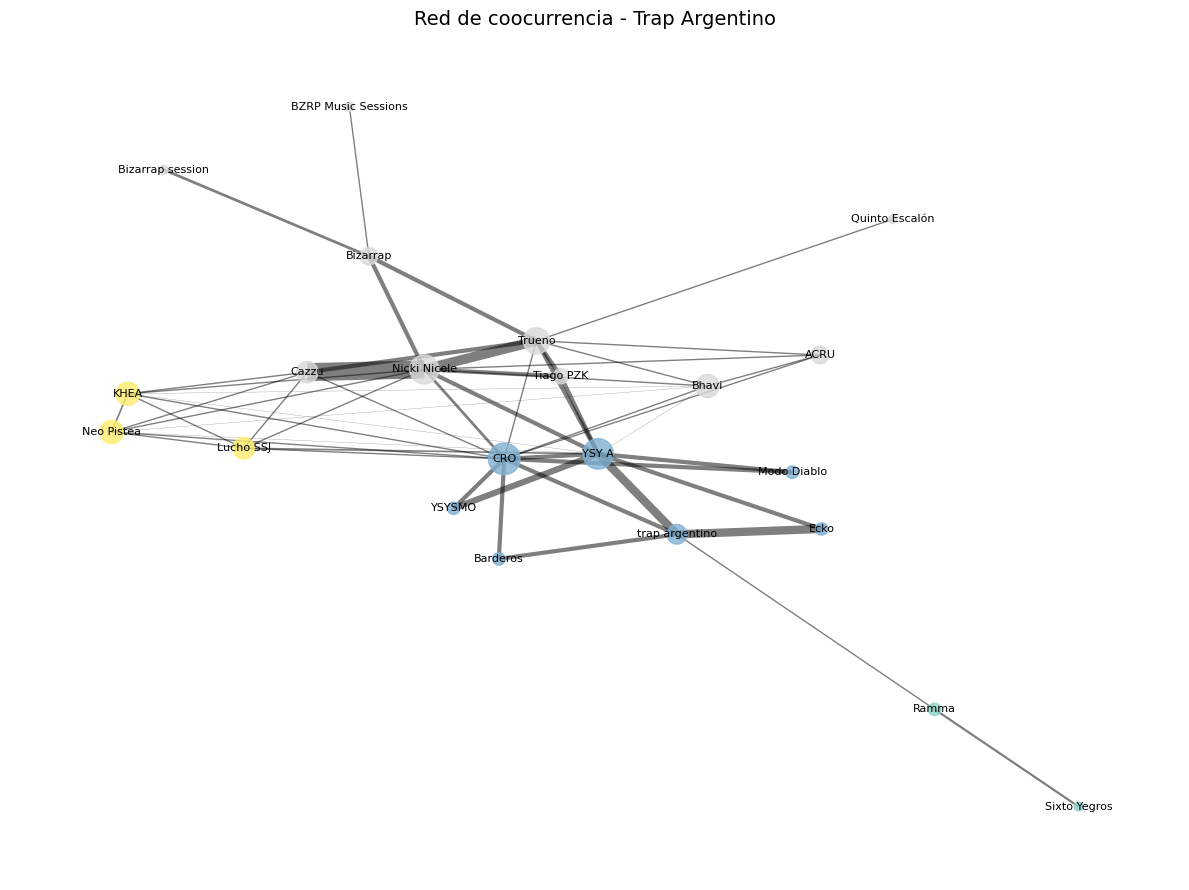

In [ ]:

# Layout
pos = nx.spring_layout(G, k=0.5)

# Colores por comunidad
comunidades = [partition.get(nodo) for nodo in G.nodes()]
tamanios = [grado[n] * 40 for n in G.nodes()]

plt.figure(figsize=(12, 9))
nx.draw_networkx_nodes(G, pos, node_size=tamanios, cmap=plt.cm.Set3, node_color=comunidades, alpha=0.8)
nx.draw_networkx_edges(G, pos, width=[G[u][v]['weight']*0.2 for u,v in G.edges()], alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=8)
plt.title("Red de coocurrencia - Trap Argentino", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()




---------------------

Creamos un DataFrame resumen que contiene métricas clave de los nodos en el grafo `G`, como el grado (número de conexiones), la centralidad de intermediación (qué tan frecuentemente un nodo actúa como puente en los caminos más cortos), la centralidad de cercanía (qué tan cerca está un nodo de los demás) y la comunidad a la que pertenece cada nodo (detectada previamente). Además, si está disponible, se incluye la centralidad de eigenvector, que mide la influencia de un nodo en función de la importancia de sus vecinos. Finalmente, el DataFrame se ordena por el grado de los nodos en orden descendente y se guarda en un archivo CSV llamado `resumen_trap.csv` para su análisis posterior.


----------------------

In [ ]:

# Crear DataFrame resumen
resumen = pd.DataFrame({
    'Palabra Clave': list(G.nodes()),
    'Grado': [grado[n] for n in G.nodes()],
    'Centralidad Intermediación': [intermediacion[n] for n in G.nodes()],
    'Centralidad Cercanía': [cercania[n] for n in G.nodes()],
    'Comunidad': [partition[n] for n in G.nodes()]
})

# Añadir eigenvector si está disponible
if 'eigenvector' in G.nodes[list(G.nodes())[0]]:
    resumen['Eigenvector'] = [G.nodes[n].get('eigenvector', 0) for n in G.nodes()]

resumen = resumen.sort_values(by='Grado', ascending=False)
resumen.to_csv("resumen_trap.csv", index=False)


-------------------------

Creamos una red dirigida de usuarios basada en menciones o citas en los tweets. Primero, convierte la columna `Palabra Clave` a minúsculas para estandarizar los datos. Luego, para cada tweet, identifica las menciones (palabras que comienzan con `@`) y construye un grafo dirigido (`G_usuarios`) donde los nodos representan usuarios y las aristas indican menciones, con un peso que refleja la cantidad de veces que un usuario menciona a otro. Posteriormente, se calculan métricas de centralidad como el grado, intermediación y cercanía para identificar usuarios influyentes en la red. Finalmente, se extraen los 10 usuarios más influyentes según la centralidad de grado y se devuelve esta información junto con el tamaño de la red (nodos y aristas).


---------------------

In [ ]:
import ast

# Convertir la columna 'hashtags' de string a lista (si es necesario)
df['Palabra CLave'] = df['Palabra Clave'].str.lower()

# Crear red de usuarios que se mencionan o se citan
G_usuarios = nx.DiGraph()
for _, row in df.iterrows():
    usuario_origen = row['Usuario'].strip('@')
    texto = str(row['Contenido'])
    menciones = []

    palabras = texto.split()
    for palabra in palabras:
        if palabra.startswith('@') and len(palabra) > 1:
            menciones.append(palabra[1:])  # quitar el '@'

    for mencionado in menciones:
        if G_usuarios.has_edge(usuario_origen, mencionado):
            G_usuarios[usuario_origen][mencionado]['weight'] += 1
        else:
            G_usuarios.add_edge(usuario_origen, mencionado, weight=1)


# Métricas en la red de usuarios
degree_centrality = nx.degree_centrality(G_usuarios)
betweenness_centrality = nx.betweenness_centrality(G_usuarios)
closeness_centrality = nx.closeness_centrality(G_usuarios)

# Usuarios más influyentes
top_influencers = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:11]

(top_influencers, len(G_usuarios.nodes), len(G_usuarios.edges))


([('youtube', 0.125),
  ('CirujanoWeb3', 0.10714285714285714),
  ('nachobulian', 0.07142857142857142),
  ('bizarrap', 0.05357142857142857),
  ('Marilo2020@gmail.com', 0.05357142857142857),
  ('grok', 0.03571428571428571),
  ('paulolondra', 0.03571428571428571),
  ('exatv', 0.03571428571428571),
  ('fischherrr', 0.03571428571428571),
  ('SponsorDiosOK', 0.03571428571428571),
  ('namedevirgo', 0.017857142857142856)],
 57,
 40)

--------------------

Construimos una red bipartita utilizando NetworkX, donde los nodos representan usuarios y artistas relacionados con el trap argentino. Se define una lista de palabras clave asociadas a artistas y fandoms, y para cada tweet en el DataFrame df, se identifica si el contenido menciona a alguno de estos artistas. Si se encuentra una coincidencia, se añade un nodo para el usuario (tipo 0) y otro para el artista (tipo 1), junto con una arista que conecta ambos nodos. Finalmente, se calculan métricas básicas de la red, como el número total de nodos y aristas, y se identifican los nodos correspondientes a los artistas. Esto permite analizar las interacciones entre usuarios y artistas en el contexto de los tweets recolectados.

-------------------------

In [72]:
# Lista de palabras clave (no solo hashtags) asociadas a fandoms/artistas
palabras_clave_artistas = ["duki",
    "bizarrap",
    "trueno",
    "khea",
    "ysy a",
    "cazzu",
    "nicki nicole",
    "lit killah",
    "tiago pzk",
    "neo pistea",
    "ecko",
    "l-gante",
    "bhavi",
    "cro",
    'ramma', 'sixto yegros', 'acru', 'lucho ssj', 'paulo londra', 'homer el mero mero', 'modo diablo']

# Red bipartita: nodo tipo usuario y nodo tipo artista
G_bipartita = nx.Graph()

for _, row in df.iterrows():
    usuario = row['Usuario'].strip('@')
    contenido = str(row['Contenido']).lower()

    for artista in palabras_clave_artistas:
        if artista in contenido:
            G_bipartita.add_node(usuario, bipartite=0)
            G_bipartita.add_node(artista, bipartite=1)
            G_bipartita.add_edge(usuario, artista)

# Métricas de la red bipartita
nodos_usuarios = {n for n, d in G_bipartita.nodes(data=True) if d.get("bipartite") == 0}
nodos_artistas = set(G_bipartita) - nodos_usuarios

(len(G_bipartita.nodes), len(G_bipartita.edges), list(nodos_artistas))


(172,
 204,
 ['l-gante',
  'paulo londra',
  'cazzu',
  'ramma',
  'nicki nicole',
  'lucho ssj',
  'duki',
  'cro',
  'bizarrap',
  'acru',
  'tiago pzk',
  'khea',
  'trueno',
  'ysy a',
  'neo pistea',
  'ecko',
  'sixto yegros',
  'lit killah',
  'bhavi',
  'homer el mero mero',
  'modo diablo'])

------------------------

Construimos una red bipartita utilizando NetworkX, donde los nodos representan usuarios y artistas relacionados con el trap argentino. Se define una lista de palabras clave asociadas a artistas, y para cada tweet en el DataFrame df, se verifica si el contenido menciona a alguno de estos artistas. Si se encuentra una coincidencia, se añade un nodo para el usuario (tipo 0) y otro para el artista (tipo 1), junto con una arista que conecta ambos nodos. Finalmente, se calculan métricas básicas de la red, como el número total de nodos y aristas, y se identifican los nodos correspondientes a los artistas detectados en la red. Esto permite analizar las interacciones entre usuarios y artistas en el contexto de los tweets recolectados.

--------------------------

In [99]:
import networkx as nx

# Lista de palabras clave de artistas
palabras_clave_artistas = ["duki",
    "bizarrap",
    "trueno",
    "khea",
    "ysy a",
    "cazzu",
    "nicki nicole",
    "lit killah",
    "tiago pzk",
    "neo pistea",
    "ecko",
    "l-gante",
    "bhavi",
    "cro",
    'ramma', 'sixto yegros', 'acru', 'lucho ssj', 'paulo londra', 'homer el mero mero', 'modo diablo']

# Crear la red bipartita
G_bipartita = nx.Graph()

for _, row in df.iterrows():
    usuario = row['Usuario'].strip('@')
    contenido = str(row['Contenido']).lower()

    for artista in palabras_clave_artistas:
        if artista in contenido:
            G_bipartita.add_node(usuario, bipartite=0)
            G_bipartita.add_node(artista, bipartite=1)
            G_bipartita.add_edge(usuario, artista)

# Métricas básicas
usuarios = {n for n, d in G_bipartita.nodes(data=True) if d.get("bipartite") == 0}
artistas = set(G_bipartita) - usuarios

print("Nodos totales:", len(G_bipartita.nodes))
print("Aristas:", len(G_bipartita.edges))
print("Artistas detectados:", artistas)


Nodos totales: 172
Aristas: 204
Artistas detectados: {'l-gante', 'paulo londra', 'cazzu', 'ramma', 'nicki nicole', 'lucho ssj', 'duki', 'cro', 'bizarrap', 'acru', 'tiago pzk', 'khea', 'trueno', 'ysy a', 'neo pistea', 'ecko', 'sixto yegros', 'lit killah', 'bhavi', 'homer el mero mero', 'modo diablo'}


-----------------------------------

Construimos un grafo de coocurrencia de palabras basado en los textos de los tweets. Primero, se tokenizan los textos limpios (`text_clean`) para extraer palabras de al menos 4 letras, almacenándolas como listas de tokens por tweet. Luego, se identifican pares de palabras que coexisten en el mismo tweet, calculando la frecuencia de cada par utilizando un contador (`Counter`). A continuación, se crea un grafo no dirigido con NetworkX, donde los nodos representan palabras y las aristas conectan palabras que coocurren, asignándoles un peso proporcional a su frecuencia de coocurrencia. Solo se incluyen pares con una frecuencia mínima de 3 (ajustable). Finalmente, el grafo se guarda en formato GEXF para su análisis y visualización en herramientas como Gephi.

------------------------------

In [ ]:
import pandas as pd
import networkx as nx
from collections import Counter
from itertools import combinations
import re


# Tokeniza y guarda palabras por tweet
df["Tokens"] = df["text_clean"].apply(lambda x: re.findall(r'\b\w{4,}\b', x))  # palabras con 4+ letras

# Saca pares de coocurrencias (solo de tweets con varias palabras)
coocurrencias = Counter()
for tokens in df["Tokens"]:
    for pair in combinations(set(tokens), 2):
        coocurrencias[tuple(sorted(pair))] += 1

# Crea grafo con NetworkX
G = nx.Graph()
for (w1, w2), weight in coocurrencias.items():
    if weight >= 3:  # puedes ajustar el umbral
        G.add_edge(w1, w2, weight=weight)

# Guardar para Gephi
nx.write_gexf(G, "coocurrencias_palabras.gexf")


-----------------

Construimos una red dirigida de menciones entre usuarios basada en los datos de la columna "Respuestas/Menciones" del DataFrame `df`. Primero, se asegura que esta columna contenga listas válidas, convirtiendo cadenas de texto en listas mediante `ast.literal_eval`. Luego, se itera sobre cada fila del DataFrame, y para cada usuario (nodo origen), se añaden aristas dirigidas hacia los usuarios mencionados en sus tweets (nodos destino). Finalmente, la red resultante se exporta en formato GEXF, lo que permite su análisis y visualización en herramientas como Gephi.


-----------------

In [ ]:
import ast

# Asegura que la columna es lista
df["Respuestas/Menciones"] = df["Respuestas/Menciones"].fillna("[]")
df["Respuestas/Menciones"] = df["Respuestas/Menciones"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])

# Crea red dirigida de menciones
G_mentions = nx.DiGraph()
for _, row in df.iterrows():
    origen = row["Usuario"]
    for mencionado in row["Respuestas/Menciones"]:
        G_mentions.add_edge(origen, mencionado)

# Exporta
nx.write_gexf(G_mentions, "red_menciones.gexf")


-----------------

Construimos un grafo de coocurrencia de palabras clave basado en los tweets. Primero, se agrupan los tweets por su contenido y se extraen las palabras clave únicas asociadas a cada uno. Luego, se generan pares de palabras clave que aparecen juntas en el mismo tweet, y se cuenta la frecuencia de coocurrencia de cada par utilizando un contador (`Counter`). A continuación, se crea un grafo no dirigido (`G_kw`) donde los nodos representan palabras clave y las aristas conectan palabras clave que coexisten, asignándoles un peso proporcional a su frecuencia de coocurrencia. Finalmente, el grafo se guarda en formato GEXF para su análisis y visualización en herramientas como Gephi.


-----------------

In [ ]:
# Crea pares de keywords si aparecen en el mismo tweet
from itertools import combinations

# Agrupa por contenido y saca las palabras clave que aparecen juntas
cooc_keywords = Counter()
df_grouped = df.groupby("Contenido")["Palabra Clave"].unique()

for keywords in df_grouped:
    for pair in combinations(sorted(set(keywords)), 2):
        cooc_keywords[pair] += 1

# Crea grafo
G_kw = nx.Graph()
for (k1, k2), weight in cooc_keywords.items():
    if weight >= 2:  # ajusta
        G_kw.add_edge(k1, k2, weight=weight)

nx.write_gexf(G_kw, "coocurrencia_keywords.gexf")


-----------------

Analizamos la red de coocurrencia de palabras clave (`G_kw`) utilizando el algoritmo de Louvain para detectar comunidades, asignando a cada nodo (palabra clave) una comunidad específica como atributo. Además, se calcula la centralidad de grado de los nodos, que mide la importancia de cada palabra clave en función de sus conexiones en la red. Ambos atributos, comunidad y centralidad, se añaden a los nodos del grafo. Finalmente, el grafo enriquecido con estos atributos se exporta en formato GEXF, lo que permite su análisis y visualización en herramientas como Gephi.


-----------------

In [ ]:
from networkx.algorithms import community

# Ejemplo: comunidades de Louvain (requiere comunidad)
import community as community_louvain

partition = community_louvain.best_partition(G_kw)
nx.set_node_attributes(G_kw, partition, 'comunidad')

# Centralidad
centralidad = nx.degree_centrality(G_kw)
nx.set_node_attributes(G_kw, centralidad, 'centralidad')

# Exporta con atributos
nx.write_gexf(G_kw, "keywords_comunidades_y_centralidad.gexf")


-----------------

Construimos una red bipartita utilizando NetworkX, donde los nodos representan artistas (extraídos de la columna "Palabra Clave") y tweets (identificados por su índice o un identificador único). Cada artista se conecta a los tweets en los que aparece mencionado, formando una red bipartita. Posteriormente, se realiza una proyección de la red bipartita para obtener una red unipartita que conecta únicamente a los artistas. En esta red proyectada, los nodos representan artistas, y las aristas entre ellos tienen un peso que indica la cantidad de tweets en los que ambos artistas fueron mencionados juntos. Esto permite analizar las relaciones y coocurrencias entre artistas en el contexto de los tweets recolectados.

-----------------

In [64]:
from networkx.algorithms import bipartite

B = nx.Graph()

for index, row in df.iterrows():
    artista = row['Palabra Clave']
    tweet = f"tweet_{index}"  # puedes usar el ID o índice como nombre de tweet
    B.add_node(artista, bipartite=0)
    B.add_node(tweet, bipartite=1)
    B.add_edge(artista, tweet)

# Proyección: solo artistas
artistas = [n for n, d in B.nodes(data=True) if d["bipartite"] == 0]
proyeccion = bipartite.weighted_projected_graph(B, artistas)


-----------------

Calculamos la centralidad de grado para los nodos del grafo G, que mide la importancia de cada nodo en función de la cantidad de conexiones que tiene con otros nodos. Luego, se identifican los 10 nodos más centrales ordenándolos en función de su valor de centralidad de grado en orden descendente. Finalmente, se imprimen los nombres de estos nodos (que pueden representar artistas o palabras clave) junto con sus valores de centralidad, permitiendo identificar los elementos más influyentes o relevantes en la red analizada.

-----------------

In [65]:
centralidad = nx.degree_centrality(G)
top_centrales = sorted(centralidad.items(), key=lambda x: x[1], reverse=True)[:10]
print("Artistas o palabras clave más centrales:")
for nodo, valor in top_centrales:
    print(f"{nodo}: {valor:.4f}")


Artistas o palabras clave más centrales:
trap: 0.3003
como: 0.1997
para: 0.1976
paulo: 0.1886
londra: 0.1854
argentino: 0.1843
duki: 0.1626
argentina: 0.1621
tiene: 0.1218
todo: 0.1049


------------

Utilizamos la técnica de TF-IDF (Term Frequency-Inverse Document Frequency) para transformar los textos limpios de los tweets en una representación numérica que refleja la importancia de las palabras en el conjunto de datos. Primero, se define un vectorizador `TfidfVectorizer` con parámetros como `max_df` para ignorar palabras demasiado frecuentes (que aparecen en más del 80% de los textos) y `min_df` para excluir palabras muy raras (que aparecen en menos de 5 textos). Además, se crea una lista personalizada de palabras vacías (`stop_words`), que incluye tanto palabras comunes en inglés como en español, además de términos irrelevantes relacionados con el contexto de los tweets. Finalmente, el vectorizador se ajusta y transforma los textos limpios (`text_clean`) en una matriz TF-IDF, donde cada fila representa un texto y cada columna una palabra, con valores que indican la relevancia de cada palabra en el texto.


------------------

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text

texts = df['text_clean'].astype(str).tolist()

vectorizer = TfidfVectorizer(
    max_df=0.8,  # ignora palabras que aparecen en más del 80% de textos
    min_df=5,    # ignora palabras rarísimas
    stop_words= None  # eliminar palabras vacías
)

X = vectorizer.fit_transform(texts)

spanish_stopwords = list(text.ENGLISH_STOP_WORDS.union([
    'https', 't', 'co', 'rt', 'amp', 'sí', 'va', 'ser', 'así', 'aquí', 'bueno', 'hace', 'más', 'menos', 'solo',
    'trap', 'argentino', 'argentina', 'pa', 'todo', 'muy', 'ya', 'lo', 'le', 'les', 'del', 'con', 'por', 'sin', 
    'que', 'te', 'me', 'se', 'esta', 'está', 'como', 'sobre', 'aun', 'aunque', 'cuando', 'entre', 'donde', 'hay'
]))

vectorizer = TfidfVectorizer(
    max_df=0.8,
    min_df=5,
    stop_words=spanish_stopwords
)

X = vectorizer.fit_transform(texts)

--------------

Generamos una nube de palabras (WordCloud) a partir del contenido de los tweets almacenados en el archivo `tweets_argentinos_combis2.csv`. Primero, se cargan los datos y se limpian los textos eliminando URLs, menciones, hashtags, caracteres especiales y convirtiendo todo a minúsculas. Luego, se define un conjunto personalizado de palabras vacías (stopwords) que incluye términos comunes en español e inglés, así como palabras irrelevantes para el análisis. A continuación, se utiliza la biblioteca `WordCloud` para crear una visualización gráfica que muestra las palabras más frecuentes en los tweets, donde el tamaño de cada palabra es proporcional a su frecuencia. Finalmente, la nube de palabras se muestra utilizando `matplotlib` con un diseño limpio y un esquema de colores específico.


----------------------

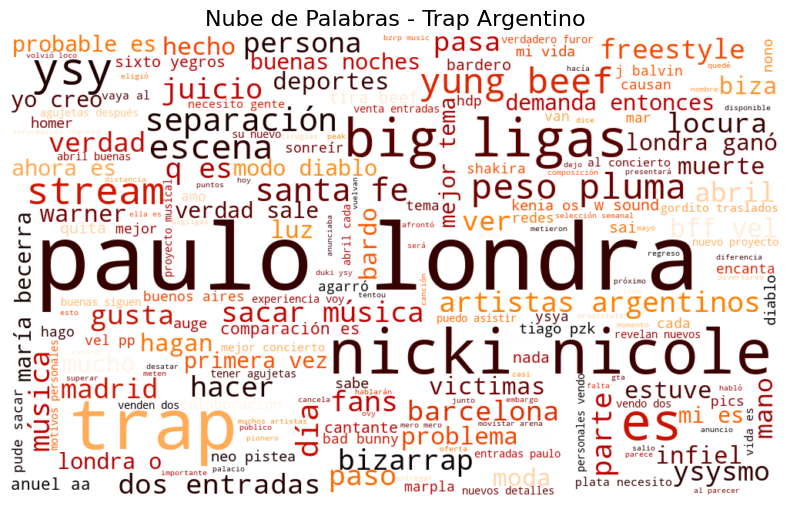

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction import text
import re

df = pd.read_csv("tweets_argentinos_combis2.csv")
texts = df["Contenido"].astype(str)

# Limpiar y unir texto
all_text = " ".join(texts).lower()
all_text = re.sub(r"http\S+|www\S+|@\S+|#\S+|[^a-záéíóúñü\s]", "", all_text)

# Stopwords personalizadas
stopwords = set(text.ENGLISH_STOP_WORDS).union(['https', 't', 'co', 'rt', 'amp', 'sí', 'va', 'ser', 'así', 'aquí', 'bueno', 'hace', 'más', 'menos', 'solo',
    'argentino', 'argentina', 'pa', 'todo', 'muy', 'ya', 'lo', 'le', 'les', 'del', 'con', 'por', 'sin', 
    'que', 'te', 'me', 'se', 'esta', 'está', 'como', 'sobre', 'aun', 'aunque', 'cuando', 'entre', 'donde', 'hay', 'en', 'el', 
    'la', 'los', 'las', 'un', 'una', 'de', 'y', 'a', 'por', 'para', 'con', 'sin', 
    'sobre', 'entre', 'tiene', 'decir','fue', 'terminó', 'e', 'vas', 'nadie', 'conoce', 'través'])


# Generar WordCloud
wordcloud = WordCloud(
    width=1000,
    height=600,
    background_color='white',
    stopwords=stopwords,
    max_words=200,
    colormap='gist_heat'
).generate(all_text)

# Mostrar
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Nube de Palabras - Trap Argentino", fontsize=16)
plt.show()


------------------

Construimos y visualizamos una red bipartita utilizando NetworkX, donde los nodos representan usuarios y palabras clave extraídas de los tweets. Para cada fila del DataFrame `df`, se añade un nodo para el usuario y nodos para cada palabra en el texto limpio (`text_clean`). Luego, se crean aristas que conectan a los usuarios con las palabras clave que aparecen en sus tweets. Finalmente, se utiliza un diseño de tipo `spring_layout` para posicionar los nodos y se dibuja la red con `matplotlib`, mostrando las conexiones entre usuarios y palabras clave en un gráfico visualmente claro.


---------------------

C:\Users\adria\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 93805 (\N{MEDEFAIDRIN SMALL LETTER A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\adria\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12415 (\N{HIRAGANA LETTER MI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\adria\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12383 (\N{HIRAGANA LETTER TA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\adria\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12356 (\N{HIRAGANA LETTER I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\adria\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 

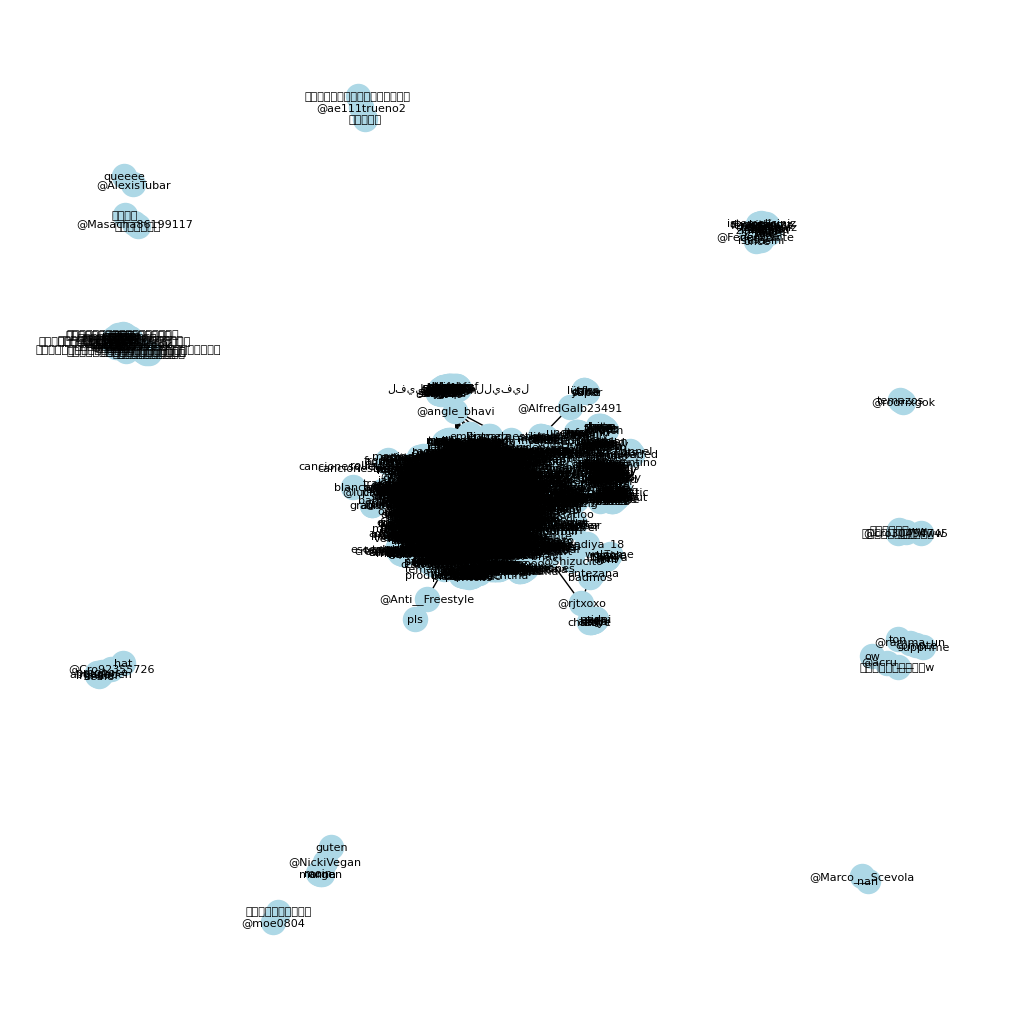

In [ ]:
import networkx as nx

# Crear el grafo bipartito
B = nx.Graph()

# Añadir nodos para los usuarios y palabras clave
for _, row in df.iterrows():
    user = row['Usuario']
    words = str(row['text_clean']).split()  # Dividimos el contenido limpio en palabras

    for word in words:
        # Añadir los nodos de usuario y palabra clave
        B.add_node(user, bipartite=0)  # Nodo de usuario
        B.add_node(word, bipartite=1)  # Nodo de palabra clave
        # Conectar el usuario con la palabra clave
        B.add_edge(user, word)

# Dibujar la red bipartita
pos = nx.spring_layout(B)
plt.figure(figsize=(10, 10))
nx.draw(B, pos, with_labels=True, node_size=300, node_color='lightblue', font_size=8)
plt.show()


---------------------------

Filtramos los tweets del DataFrame `df` para identificar aquellos que mencionan a los artistas "Duki", "Bizarrap" y "Nicki Nicole" en la columna `Palabra Clave`. Luego, se define una función llamada `most_common_words` que utiliza la clase `Counter` para calcular las 20 palabras más frecuentes en los textos limpios (`text_clean`) de los tweets filtrados. Posteriormente, se aplica esta función a los tweets de cada artista para analizar las palabras más comunes asociadas a ellos. Finalmente, se imprimen las 20 palabras más frecuentes para cada artista, lo que permite identificar términos clave relacionados con su presencia en los tweets.


---------------------

In [ ]:
# Filtramos los tuits por artista
duki_tweets = df[df['Palabra Clave'].str.contains('Duki', case=False, na=False)]
bizarrap_tweets = df[df['Palabra Clave'].str.contains('Bizarrap', case=False, na=False)]
nicki_tweets = df[df['Palabra Clave'].str.contains('NickiNicole', case=False, na=False)]

# Función para extraer las palabras más comunes
from collections import Counter

def most_common_words(df):
    all_words = ' '.join(df['text_clean']).split()
    word_freq = Counter(all_words)
    return word_freq.most_common(20)

# Analizamos las palabras más comunes por artista
duki_words = most_common_words(duki_tweets)
bizarrap_words = most_common_words(bizarrap_tweets)
nicki_words = most_common_words(nicki_tweets)

# Mostrar las 20 palabras más comunes para cada artista
print("Duki - Palabras más comunes:", duki_words)
print("Bizarrap - Palabras más comunes:", bizarrap_words)
print("Nicki Nicole - Palabras más comunes:", nicki_words)


Duki - Palabras más comunes: [('de', 150), ('duki', 135), ('y', 135), ('el', 125), ('a', 90), ('con', 85), ('es', 75), ('no', 75), ('en', 70), ('que', 65), ('la', 65), ('beef', 60), ('una', 50), ('bizarrap', 45), ('ha', 45), ('me', 40), ('te', 30), ('ahora', 30), ('estuve', 30), ('persona', 30)]
Bizarrap - Palabras más comunes: [('de', 240), ('bizarrap', 210), ('la', 130), ('y', 125), ('a', 120), ('es', 110), ('que', 110), ('no', 105), ('con', 80), ('el', 75), ('una', 75), ('en', 65), ('se', 65), ('un', 65), ('beef', 60), ('su', 50), ('duki', 45), ('sesión', 45), ('como', 40), ('música', 40)]
Nicki Nicole - Palabras más comunes: [('nickinicole', 40), ('con', 40), ('miranda', 30), ('de', 30), ('música', 30), ('a', 20), ('nicki', 20), ('nicole', 20), ('que', 20), ('te', 20), ('béele', 20), ('marcanthony', 20), ('crismj', 20), ('y', 20), ('muchos', 20), ('artistas', 20), ('más', 20), ('en', 20), ('selección', 20), ('semanal', 20)]


--------------------

Analizamos el contenido de los tweets para identificar las palabras más comunes asociadas a cada artista de una lista predefinida. Primero, se descargan y utilizan las stopwords en español de ```NLTK``` para excluir palabras irrelevantes. Luego, se define una función most_common_words que filtra los tweets relacionados con un artista específico, limpia el texto eliminando palabras vacías y calcula la frecuencia de las palabras restantes utilizando la clase Counter. Posteriormente, se aplica esta función a cada artista de la lista, generando un diccionario que asocia a cada artista con sus 10 palabras más frecuentes. Finalmente, se imprimen estas palabras para cada artista, permitiendo identificar términos clave relacionados con su presencia en los tweets.

----------------------

In [60]:
from collections import Counter
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import nltk
from nltk.corpus import stopwords

# Asegúrate de tener descargadas las stopwords de NLTK (solo la primera vez)
nltk.download('stopwords')
spanish_stopwords = set(stopwords.words('spanish'))  # Stopwords en español

# Lista de artistas
artists = [
    "duki", "bizarrap", "trueno", "khea", "ysy a", "cazzu", "nicki nicole",
    "lit killah", "tiago pzk", "neo pistea", "ecko", "l-gante", "bhavi", 
    "cro", 'ramma', 'sixto yegros', 'acru', 'lucho ssj', 'paulo londra', 
    'homer el mero mero', 'modo diablo'
]

# Función para obtener las palabras más comunes para un artista, excluyendo stopwords
def most_common_words(df, artist):
    # Filtrar los tuits del artista
    artist_tweets = df[df['Palabra Clave'].str.contains(artist, case=False, na=False)]
    # Asegurarse de que no haya NaN y convertir a cadena vacía si es necesario
    artist_tweets['text_clean'] = artist_tweets['text_clean'].fillna('')

    # Unir todos los tuits y separar en palabras
    all_words = ' '.join(artist_tweets['text_clean']).split()
    # Filtrar stopwords
    filtered_words = [word for word in all_words if word.lower() not in spanish_stopwords]
    word_freq = Counter(filtered_words)
    return word_freq.most_common(10)

# Analizar las palabras más comunes por artista

artists_words = {}
for artist in artists:
    artists_words[artist] = most_common_words(df, artist)

# Mostrar las 20 palabras más comunes para cada artista
for artist, words in artists_words.items():
    print(f"{artist} - Palabras más comunes:", words)


duki - Palabras más comunes: [('duki', 135), ('beef', 60), ('bizarrap', 45), ('ahora', 30), ('persona', 30), ('distancia', 30), ('si', 30), ('yung', 30), ('puto', 30), ('in', 20)]
bizarrap - Palabras más comunes: [('bizarrap', 210), ('beef', 60), ('duki', 45), ('sesión', 45), ('música', 40), ('session', 35), ('persona', 30), ('distancia', 30), ('trap', 30), ('ahora', 25)]
trueno - Palabras más comunes: [('mutis', 15), ('ninguno', 5), ('papá', 5), ('gente', 5), ('bien', 5), ('quiere', 5), ('operadores', 5), ('casta', 5), ('viejo', 5), ('bolas', 5)]
khea - Palabras más comunes: [('เฮย', 15), ('jackjae', 10), ('คดถงยยจวเลย', 5), ('ผมไมเคยนอกใจซอหวงแมแตครงเดยว', 5), ('ซอ', 5), ('กสบครง', 5), ('มนไมใชครงเดยวน', 5), ('ทานายยย', 5), ('ขอใหซอระวงคำพดดวยคะ', 5), ('ผมไลคณออกจากการเปนทานาย', 5)]
ysy a - Palabras más comunes: [('ysy', 119), ('homer', 80), ('q', 62), ('bardo', 60), ('duki', 58), ('cro', 50), ('mero', 40), ('ver', 39), ('d', 35), ('videoclip', 31)]
cazzu - Palabras más comunes: [('c

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adria\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\adria\AppData\Local\Temp\ipykernel_18744\2689649786.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  artist_tweets['text_clean'] = artist_tweets['text_clean'].fillna('')


-----------------

Identificamos los términos comunes entre las palabras más frecuentes asociadas a diferentes artistas. Para ello, se comparan las listas de palabras más comunes de cada par de artistas, excluyendo los casos en los que se comparan un artista consigo mismo. Se utiliza la intersección de conjuntos para encontrar las palabras que aparecen en ambas listas. Los términos comunes se almacenan en un diccionario, donde las claves son pares de artistas y los valores son los conjuntos de palabras compartidas. Finalmente, se imprimen las palabras comunes para cada par de artistas, lo que permite analizar similitudes en el lenguaje utilizado en los tweets relacionados con ellos.

---------------------

In [58]:
# Encontrar términos comunes entre artistas
common_words = {}
for artist1, words1 in artists_words.items():
    for artist2, words2 in artists_words.items():
        if artist1 != artist2:
            common = set(dict(words1).keys()).intersection(set(dict(words2).keys()))
            if common:
                common_words[(artist1, artist2)] = common

# Mostrar las palabras comunes entre artistas
for artists_pair, common in common_words.items():
    print(f"Palabras comunes entre {artists_pair[0]} y {artists_pair[1]}: {common}")


Palabras comunes entre duki y bizarrap: {'distancia', 'persona', 'ahora', 'beef', 'duki', 'bizarrap'}
Palabras comunes entre duki y ysy a: {'duki'}
Palabras comunes entre duki y tiago pzk: {'si'}
Palabras comunes entre duki y cro: {'duki'}
Palabras comunes entre bizarrap y duki: {'distancia', 'persona', 'ahora', 'beef', 'duki', 'bizarrap'}
Palabras comunes entre bizarrap y ysy a: {'duki'}
Palabras comunes entre bizarrap y cro: {'duki'}
Palabras comunes entre bizarrap y paulo londra: {'música', 'trap'}
Palabras comunes entre bizarrap y modo diablo: {'trap'}
Palabras comunes entre ysy a y duki: {'duki'}
Palabras comunes entre ysy a y bizarrap: {'duki'}
Palabras comunes entre ysy a y cazzu: {'q', 'd'}
Palabras comunes entre ysy a y nicki nicole: {'d'}
Palabras comunes entre ysy a y cro: {'bardo', 'd', 'q', 'duki', 'cro', 'homer', 'ysy'}
Palabras comunes entre ysy a y homer el mero mero: {'q', 'homer', 'mero', 'ysy'}
Palabras comunes entre cazzu y ysy a: {'q', 'd'}
Palabras comunes entre c

-------------------

Generamos una nube de palabras (WordCloud) a partir de los textos limpios (`text_clean`) de un DataFrame `df`. Primero, se asegura que no haya valores nulos en la columna `text_clean`, reemplazándolos por cadenas vacías. Luego, se concatenan todos los textos de la columna en una sola cadena y se dividen en palabras individuales. A continuación, se filtran las palabras vacías (stopwords) en español utilizando la lista proporcionada por NLTK. Posteriormente, se calcula la frecuencia de cada palabra restante utilizando la clase `Counter`. Finalmente, se utiliza la biblioteca `WordCloud` para crear una visualización gráfica de las palabras más frecuentes, donde el tamaño de cada palabra es proporcional a su frecuencia, y se muestra la nube de palabras utilizando `matplotlib`.


------------------------

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adria\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


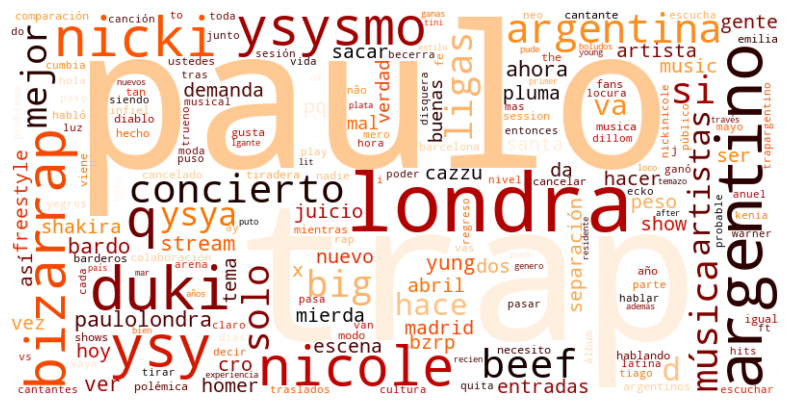

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
spanish_stopwords = set(stopwords.words('spanish'))  # Stopwords en español

def generate_wordcloud(df):
    # Asegurarse de que no haya NaN y convertir a cadena vacía si es necesario
    df['text_clean'] = df['text_clean'].fillna('')
    
    # Unir todos los textos de la columna 'text_clean' y separar en palabras
    all_words = ' '.join(df['text_clean']).split()
    
    # Filtrar stopwords
    filtered_words = [word for word in all_words if word.lower() not in spanish_stopwords]
    
    # Contar la frecuencia de cada palabra
    word_freq = Counter(filtered_words)
    
    # Crear la nube de palabras
    wordcloud = WordCloud(width=800, height=400, background_color='white',    colormap='gist_heat').generate_from_frequencies(word_freq)
    
    # Mostrar la nube de palabras
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

generate_wordcloud(df)


-----------

Este bloque de código construye un grafo dirigido basado en las menciones entre usuarios extraídas de los tweets. Primero, se carga un archivo CSV con los datos de los tweets y se asegura que la columna Respuestas/Menciones sea interpretada como listas. Luego, se generan las aristas del grafo, donde cada arista conecta a un usuario (origen) con otro usuario mencionado (destino). A partir de estas aristas, se crea un grafo dirigido utilizando NetworkX. Posteriormente, se calculan métricas de centralidad como la centralidad de grado, centralidad de intermediación, grado de entrada y grado de salida para cada nodo (usuario). Finalmente, se crean dos DataFrames: uno para los nodos con sus atributos y otro para las aristas, los cuales se exportan como archivos CSV para su análisis en herramientas como Gephi.

-----------

In [ ]:
import pandas as pd
import ast
import networkx as nx

# Cargar CSV limpio
df = pd.read_csv("tweets_argentinos_combis2.csv")

# Asegurar que la columna 'Respuestas/Menciones' se lea como lista (está en formato string)
df["Respuestas/Menciones"] = df["Respuestas/Menciones"].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x != "[]" else [])

# Crear lista de aristas (Usuario menciona a otro usuario)
edges = []
for _, row in df.iterrows():
    origen = row["Usuario"]
    for destino in row["Respuestas/Menciones"]:
        edges.append((origen, destino))

# Crear grafo dirigido
G = nx.DiGraph()
G.add_edges_from(edges)

# Calcular centralidades para análisis posterior
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
in_degree = dict(G.in_degree())
out_degree = dict(G.out_degree())

# Crear DataFrame de nodos con atributos
nodos_df = pd.DataFrame({
    "Id": list(G.nodes()),
    "Label": list(G.nodes()),
    "DegreeCentrality": [degree_centrality[n] for n in G.nodes()],
    "BetweennessCentrality": [betweenness_centrality[n] for n in G.nodes()],
    "InDegree": [in_degree[n] for n in G.nodes()],
    "OutDegree": [out_degree[n] for n in G.nodes()],
})

# Crear DataFrame de aristas
aristas_df = pd.DataFrame(edges, columns=["Source", "Target"])
aristas_df["Weight"] = 1  # Puedes agregar lógica para contar múltiples menciones

# Exportar archivos para Gephi
nodos_path = "nodos_usuarios.csv"
aristas_path = "aristas_usuarios.csv"
nodos_df.to_csv(nodos_path, index=False)
aristas_df.to_csv(aristas_path, index=False)

nodos_path, aristas_path

('nodos_usuarios.csv', 'aristas_usuarios.csv')

-----------

Este bloque de código construye una red de coocurrencia de temas (palabras clave) basada en los usuarios que mencionan múltiples temas en sus tweets. Primero, se carga un archivo CSV con los datos de los tweets y se agrupan las palabras clave asociadas a cada usuario, eliminando duplicados. Luego, para cada usuario, se generan pares de palabras clave (combinaciones) que coexisten en sus tweets, y se cuentan las ocurrencias de cada par en toda la base de datos. A partir de estos pares, se crean dos DataFrames: uno para las aristas, que incluye los pares de palabras clave y su peso (frecuencia de coocurrencia), y otro para los nodos, que contiene las palabras clave únicas. Finalmente, ambos DataFrames se exportan como archivos CSV para su análisis en herramientas como Gephi.

-----------


In [81]:
import pandas as pd
from itertools import combinations
import networkx as nx

# Cargar el CSV
df = pd.read_csv("tweets_argentinos_combis2.csv")

# Agrupar por usuario y juntar todas las palabras clave asociadas
temas_por_usuario = df.groupby("Usuario")["Palabra Clave"].apply(lambda x: list(set(x))).reset_index()

# Crear aristas por coocurrencia de temas por usuario
aristas = []

for _, row in temas_por_usuario.iterrows():
    temas = row["Palabra Clave"]
    if len(temas) > 1:
        for comb in combinations(sorted(temas), 2):
            aristas.append(comb)

# Contar ocurrencias de cada par
aristas_df = pd.DataFrame(aristas, columns=["Source", "Target"])
aristas_df = aristas_df.value_counts().reset_index(name="Weight")

# Crear nodos únicos
nodos = set(aristas_df["Source"]).union(set(aristas_df["Target"]))
nodos_df = pd.DataFrame({"Id": list(nodos)})
aristas_df.to_csv("aristas_temas.csv", index=False)
nodos_df.to_csv("nodos_temas.csv", index=False)


-----------

Este bloque de código construye una red bipartita utilizando NetworkX, donde los nodos representan usuarios y artistas relacionados con el trap argentino. Se define una lista de palabras clave asociadas a artistas, y para cada tweet en el DataFrame df, se verifica si el contenido menciona a alguno de estos artistas. Si se encuentra una coincidencia, se añade un nodo para el usuario (tipo 0) y otro para el artista (tipo 1), junto con una arista que conecta ambos nodos. Finalmente, se calculan métricas básicas de la red, como el número total de nodos y aristas, y se identifican los nodos correspondientes a los artistas detectados en la red. Esto permite analizar las interacciones entre usuarios y artistas en el contexto de los tweets recolectados.

-----------

In [ ]:
import networkx as nx

# Lista de palabras clave de artistas
palabras_clave_artistas = ["duki",
    "bizarrap",
    "trueno",
    "khea",
    "ysy a",
    "cazzu",
    "nicki nicole",
    "lit killah",
    "tiago pzk",
    "neo pistea",
    "ecko",
    "l-gante",
    "bhavi",
    "cro",
    'ramma', 'sixto yegros', 'acru', 'lucho ssj', 'paulo londra', 'homer el mero mero', 'modo diablo']

# Crear la red bipartita
G_bipartita = nx.Graph()

for _, row in df.iterrows():
    usuario = row['Usuario'].strip('@')
    contenido = str(row['Contenido']).lower()

    for artista in palabras_clave_artistas:
        if artista in contenido:
            G_bipartita.add_node(usuario, bipartite=0)
            G_bipartita.add_node(artista, bipartite=1)
            G_bipartita.add_edge(usuario, artista)

# Métricas básicas
usuarios = {n for n, d in G_bipartita.nodes(data=True) if d.get("bipartite") == 0}
artistas = set(G_bipartita) - usuarios

print("Nodos totales:", len(G_bipartita.nodes))
print("Aristas:", len(G_bipartita.edges))
print("Artistas detectados:", artistas)


Nodos totales: 172
Aristas: 204
Artistas detectados: {'l-gante', 'paulo londra', 'cazzu', 'ramma', 'nicki nicole', 'lucho ssj', 'duki', 'cro', 'bizarrap', 'acru', 'tiago pzk', 'khea', 'trueno', 'ysy a', 'neo pistea', 'ecko', 'sixto yegros', 'lit killah', 'bhavi', 'homer el mero mero', 'modo diablo'}


-----------

Este bloque de código construye un grafo no dirigido a partir de datos de nodos y aristas almacenados en archivos CSV. Primero, se cargan los datos de nodos y aristas utilizando pandas. Luego, se crea el grafo utilizando las aristas definidas en el archivo correspondiente, y se añaden atributos a los nodos si están disponibles en el archivo de nodos. Posteriormente, se calculan varias métricas de centralidad para los nodos del grafo, como el grado, la centralidad de intermediación (betweenness), la centralidad de cercanía (closeness) y la centralidad de vector propio (eigenvector). Finalmente, se organiza toda esta información en un DataFrame que resume las métricas calculadas para cada nodo, permitiendo un análisis detallado de su importancia en la red.

-----------

In [82]:
import pandas as pd
import networkx as nx

# Cargar los datos
nodos_df = pd.read_csv("nodos_temas.csv")
aristas_df = pd.read_csv("aristas_temas.csv")

# Crear el grafo desde los datos de aristas
G = nx.from_pandas_edgelist(aristas_df, source="Source", target="Target", edge_attr=True)

# Añadir atributos de los nodos si los hay
for _, row in nodos_df.iterrows():
    if row['Id'] in G:
        G.nodes[row['Id']].update(row.drop('Id').to_dict())

# Calcular métricas
degree_dict = dict(G.degree())
betweenness_dict = nx.betweenness_centrality(G)
closeness_dict = nx.closeness_centrality(G)
eigenvector_dict = nx.eigenvector_centrality(G)

# Crear un DataFrame resumen con todas las métricas
metrics_df = pd.DataFrame({
    "Nodo": list(G.nodes),
    "Grado": [degree_dict[n] for n in G.nodes],
    "Centralidad_Betweenness": [betweenness_dict[n] for n in G.nodes],
    "Centralidad_Closeness": [closeness_dict[n] for n in G.nodes],
    "Centralidad_Eigenvector": [eigenvector_dict[n] for n in G.nodes]
})

metrics_df.head()


,Nodo,Grado,Centralidad_Betweenness,Centralidad_Closeness,Centralidad_Eigenvector
0,escena trap Argentina,1,0.0,0.066667,6.974456e-08
1,escena trap argentina,1,0.0,0.066667,6.974456e-08
2,#BZRP,1,0.0,0.066667,6.974456e-08
3,#Bizarrap,1,0.0,0.066667,6.974456e-08
4,BZRP Music Sessions,3,0.0,0.213333,4.820444e-01


In [83]:
popularidad_temas = df["Palabra Clave"].value_counts().reset_index()
popularidad_temas.columns = ["Tema", "Menciones"]


popularidad_usuarios = df["Usuario"].value_counts().reset_index()
popularidad_usuarios.columns = ["Usuario", "Tweets Publicados"]


In [84]:

import ast

def convertir_a_lista(x):
    if isinstance(x, list):  # si ya es lista, no hacemos nada
        return x
    try:
        return ast.literal_eval(x)  # intenta convertir desde string
    except:
        return []  # si falla, devuelve lista vacía

df["Respuestas/Menciones"] = df["Respuestas/Menciones"].apply(convertir_a_lista)


--------------------

Este bloque de código realiza un análisis de las menciones y enlaces compartidos en los tweets. Primero, utiliza la clase Counter para contar cuántas veces cada usuario es mencionado en la columna Respuestas/Menciones, generando un DataFrame con los usuarios mencionados y la cantidad de veces que fueron mencionados. Luego, calcula el número de enlaces compartidos en cada tweet, convirtiendo la columna Enlaces en listas y contando su longitud. Finalmente, agrupa los datos para obtener el total de enlaces compartidos por tema (columna Palabra Clave) y por usuario, creando dos DataFrames que resumen esta información. Esto permite analizar la popularidad de los usuarios mencionados y la distribución de enlaces compartidos en los tweets.

--------------

In [85]:

from collections import Counter

menciones = Counter()
for lista in df["Respuestas/Menciones"]:
    menciones.update(lista)

popularidad_menciones = pd.DataFrame(menciones.items(), columns=["Usuario Mencionado", "Veces Mencionado"])

df["Num_Enlaces"] = df["Enlaces"].apply(lambda x: len(ast.literal_eval(x)) if pd.notna(x) and x != '[]' else 0)

enlaces_por_tema = df.groupby("Palabra Clave")["Num_Enlaces"].sum().reset_index()
enlaces_por_tema.columns = ["Tema", "Enlaces Compartidos"]

enlaces_por_usuario = df.groupby("Usuario")["Num_Enlaces"].sum().reset_index()
enlaces_por_usuario.columns = ["Usuario", "Enlaces Compartidos"]




In [86]:

df["Fecha"] = pd.to_datetime(df["Fecha y Hora"]).dt.date

frecuencia_temporal = df.groupby(["Fecha", "Palabra Clave"]).size().reset_index(name="Frecuencia")
df["Hora"] = pd.to_datetime(df["Fecha y Hora"]).dt.hour

frecuencia_hora = df.groupby(["Hora", "Palabra Clave"]).size().reset_index(name="Frecuencia")


In [87]:
popularidad_temas.to_csv("popularidad_temas.csv", index=False)
popularidad_usuarios.to_csv("popularidad_usuarios.csv", index=False)
popularidad_menciones.to_csv("usuarios_mencionados.csv", index=False)
enlaces_por_tema.to_csv("enlaces_por_tema.csv", index=False)
frecuencia_temporal.to_csv("frecuencia_temporal_temas.csv", index=False)
popularidad_menciones.to_csv("usuarios_mencionados.csv",index= False)


-----------

Este bloque de código carga un archivo CSV que contiene tweets y procesa su contenido para identificar menciones a una lista predefinida de artistas relacionados con el trap argentino. Primero, se eliminan las filas con valores nulos en la columna "Contenido" y se convierte todo el texto de esta columna a minúsculas para facilitar la detección de coincidencias. Luego, se define una nueva columna llamada "Artistas_Mencionados", que contiene una lista de los artistas mencionados en cada tweet, utilizando una función que verifica si los nombres de los artistas aparecen en el texto del tweet. Finalmente, se filtran los tweets para conservar únicamente aquellos que mencionan al menos a un artista, almacenándolos en un nuevo DataFrame llamado df_filtrado.

-----------

In [106]:
import pandas as pd

# Carga el CSV
df = pd.read_csv("tweets_argentinos_combis2.csv")

# Lista de artistas a detectar en los tweets
artistas = ["duki",
    "bizarrap",
    "trueno",
    "khea",
    "ysy a",
    "cazzu",
    "nicki nicole",
    "lit killah",
    "tiago pzk",
    "neo pistea",
    "ecko",
    "l-gante",
    "bhavi",
    "cro",
    'ramma', 'sixto yegros', 'acru', 'lucho ssj', 'paulo londra', 'homer el mero mero', 'modo diablo']

df = df.dropna(subset=["Contenido"])
df["Contenido"] = df["Contenido"].str.lower()

# Convertimos todo a minúsculas para detectar bien
df["Contenido"] = df["Contenido"].str.lower()


# Detectamos menciones a artistas
df["Artistas_Mencionados"] = df["Contenido"].apply(
    lambda x: [artista for artista in artistas if artista in x]
)

# Filtramos solo los que mencionan al menos uno
df_filtrado = df[df["Artistas_Mencionados"].map(len) > 0]


-----------

Este bloque de código construye una red bipartita utilizando NetworkX, donde los nodos representan usuarios y artistas mencionados en los tweets. Para cada fila del DataFrame df_filtrado, se añaden nodos correspondientes al usuario y a los artistas mencionados en el tweet, y se crea una arista que conecta al usuario con cada artista mencionado. Finalmente, la red bipartita resultante se exporta en formato GEXF, lo que permite su análisis y visualización en herramientas como Gephi.

-----------

In [107]:
# Crear red bipartita
B = nx.Graph()

# Añadir nodos y aristas
for _, row in df_filtrado.iterrows():
    usuario = row["Usuario"]
    for artista in row["Artistas_Mencionados"]:
        B.add_node(usuario, bipartite=0)
        B.add_node(artista, bipartite=1)
        B.add_edge(usuario, artista)

# Exportar a Gephi
nx.write_gexf(B, "red_bipartita_trap.gexf")
